In [50]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [51]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<ol>
<li>age (Age in years)</li>
<li>sex : (1 = male, 0 = female)</li>
<li>cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2:non-anginal pain, 3: typical angina]
<li>trestbps (Resting Blood Pressure in mm/hg )
<li>chol (Serum Cholesterol in mg/dl)
<li>fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
<li>restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality]
<li>thalach (maximum heart rate achieved)
<li>exang (Exercise Induced Angina): [1 = yes, 0 = no]
<li>oldpeak (ST depression induced by exercise relative to rest)
<li>slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]
<li>ca [number of major vessels (0–3)
<li>thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]
<li>target: [0 = disease, 1 = no disease]
</ol>


In [2]:
# url='/content/drive/MyDrive/heart.csv'
url='heartdisease.csv'
import pandas as pd
import numpy as np
df=pd.read_csv(url)

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


#Check data type

##The variables types are
<ul>
<li>Binary: sex, fbs, exang, target
<li>Categorical: cp, restecg, slope, ca, thal
<li>Continuous: age, trestbps, chol, thalac, oldpeak

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
num           int64
dtype: object

In [6]:
# to know unique values 
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
dtype: int64

In [7]:
# change the categorical type to categorical variables
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

#Error Correction

##Check for the data characters mistakes
###feature ‘ca’ ranges from 0–3, however, df.nunique() listed 0–4. So lets find the ‘4’ and change them to NaN.

In [8]:
df['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [9]:
# to count the number in of each category decending order
df.ca.value_counts()

ca
0    176
1     65
2     38
3     20
?      4
Name: count, dtype: int64

In [10]:
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [11]:
df.loc[df['ca']==4,'ca']=np.NaN

In [12]:
df['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

### Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN

In [13]:
df.thal.value_counts()

thal
3    166
7    117
6     18
?      2
Name: count, dtype: int64

In [14]:
df.loc[df['thal']==0,'thal']=np.NaN

In [15]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [16]:
df['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

*italicized text*###Check for missing values and replace them

In [17]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [18]:
df = df.fillna(df.median())
df.isnull().sum()

TypeError: Cannot convert [['6' '3' '7' '3' '3' '3' '3' '3' '7' '7' '6' '3' '6' '7' '7' '3' '7' '3'
  '3' '3' '3' '3' '3' '7' '7' '3' '3' '3' '3' '7' '3' '7' '3' '7' '3' '3'
  '7' '6' '7' '3' '7' '7' '3' '3' '3' '7' '3' '7' '3' '3' '3' '7' '3' '3'
  '7' '7' '7' '7' '3' '3' '7' '3' '7' '3' '7' '7' '3' '7' '7' '3' '3' '7'
  '7' '6' '3' '3' '7' '3' '3' '7' '3' '3' '3' '7' '3' '3' '3' '?' '3' '3'
  '3' '7' '7' '3' '3' '7' '7' '7' '3' '3' '3' '3' '3' '3' '7' '7' '7' '7'
  '7' '7' '7' '3' '6' '7' '7' '6' '3' '3' '7' '7' '7' '7' '3' '7' '3' '3'
  '7' '7' '3' '3' '7' '7' '3' '3' '3' '3' '7' '7' '7' '3' '3' '7' '3' '7'
  '7' '3' '7' '3' '3' '3' '7' '3' '7' '7' '3' '3' '7' '7' '7' '7' '7' '3'
  '3' '3' '3' '7' '3' '3' '7' '3' '7' '7' '3' '3' '6' '7' '7' '6' '3' '3'
  '7' '7' '3' '7' '3' '3' '7' '6' '7' '7' '3' '7' '7' '3' '3' '3' '3' '3'
  '3' '3' '3' '3' '7' '7' '7' '7' '7' '7' '3' '3' '3' '7' '3' '7' '3' '7'
  '3' '3' '3' '3' '3' '3' '3' '7' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
  '3' '3' '7' '7' '3' '3' '3' '3' '3' '3' '3' '3' '7' '3' '7' '3' '6' '7'
  '7' '3' '3' '3' '3' '3' '3' '7' '3' '3' '3' '3' '3' '6' '?' '6' '7' '3'
  '7' '6' '7' '3' '3' '7' '3' '3' '3' '3' '7' '3' '7' '3' '7' '6' '6' '7'
  '7' '3' '7' '3' '6' '7' '3' '3' '6' '7' '7' '7' '7' '3' '3']] to numeric

###Check for duplicate rows

In [ ]:
duplicated=df.duplicated().sum()
if duplicated:
  print("Duplicated rows :{}".format(duplicated))
else:
  print("No duplicates")


In [19]:
duplicates=df[df.duplicated(keep=False)]
duplicates.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


###statistical summary
<ol>
<li>check on the min and max value for the categorical variables (min-max). Sex (0–1), cp (0–3), fbs (0–1), restecg (0–2), exang (0–1), slope (0–2), ca (0–3), thal (0–3). 
<li>Observe the mean, std, 25% and 75% on the continuous variables.

In [20]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.937294
std,9.038662,17.599748,51.776918,22.875003,1.161075,1.228536
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


####Before we plot the outliers, let's change the labeling for better visualization and interpretation.

In [22]:
# df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['slope'] = df.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

###Outliers Detection & Handling

In [26]:
xx=df.slope.value_counts()

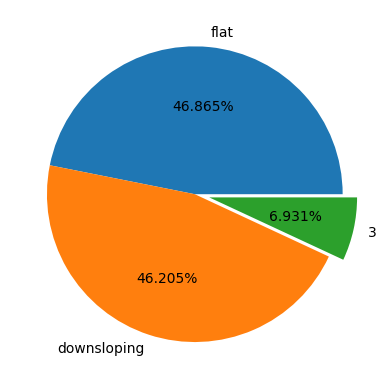

In [27]:
plt.pie(xx,
        labels=xx.index,
        autopct='%1.3f%%',
       explode=[0,0,0.1]);

In [34]:
yy=df.exang.value_counts()
yy

exang
No     204
Yes     99
Name: count, dtype: int64

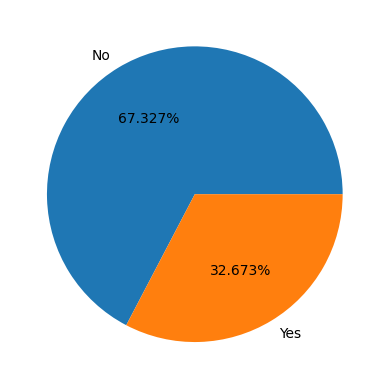

In [37]:
plt.pie(yy,
        labels=yy.index,
        autopct='%1.3f%%',
       explode=[0,0]);

In [38]:
zz=df.thal.value_counts()
zz

thal
3    166
7    117
6     18
?      2
Name: count, dtype: int64

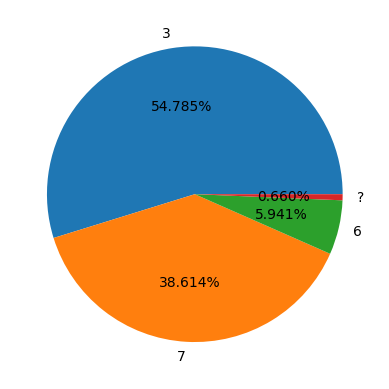

In [42]:
plt.pie(zz,
        labels=zz.index,
        autopct='%1.3f%%',
       explode=[0,0,0,0]);

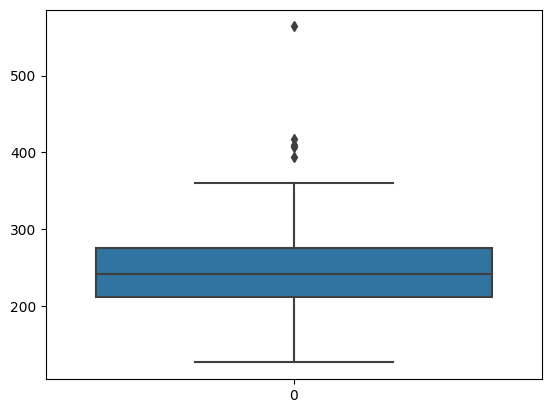

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb
bxplt = sb.boxplot(df["chol"])
plt.show()

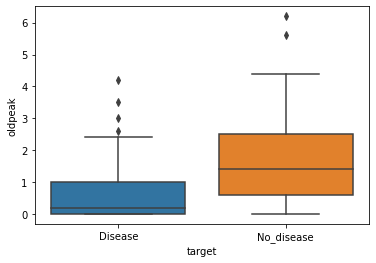

In [74]:
sb.boxplot(x='target', y='oldpeak', data=df)

In [75]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


**Drop Outliers**

In [76]:
outliers(df[continous_features],drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [86]:
from sklearn import preprocessing
df=df.apply(preprocessing.LabelEncoder().fit_transform)

In [87]:
X = df.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,29,1,0,30,62,1,0,47,0,22,2,0,0
1,3,1,2,21,77,0,1,82,0,32,2,0,2
2,7,0,1,21,34,0,0,69,0,14,0,0,2
3,22,1,1,13,65,0,1,74,0,8,0,0,2
4,23,0,3,13,141,0,1,60,1,6,0,0,2


In [79]:
X.shape

(284, 13)

In [88]:
y = df['target']

In [81]:
y.head(10)

0     Disease
1     Disease
2     Disease
3     Disease
4     Disease
5     Disease
6     Disease
7     Disease
9     Disease
10    Disease
Name: target, dtype: object

In [82]:
y.shape

(284,)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (227, 13)
X_test :  (57, 13)
y_train :  (227,)
y_test :  (57,)


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [91]:
print(y_pred)

[0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1
 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1]
